In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [4]:
student_data = pd.read_csv("Student_Performancee.csv")

In [6]:
# verilere bakmak için ilk 10 değeri çağırdım
student_data.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [8]:
# matematiksel değerleri çağırdım
student_data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [10]:
student_data.shape

(10000, 6)

In [12]:
student_data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [14]:
student_data["Performance Index"].value_counts()

Performance Index
67.0     187
45.0     185
56.0     181
49.0     181
40.0     180
        ... 
14.0       7
99.0       6
11.0       5
100.0      3
10.0       1
Name: count, Length: 91, dtype: int64

In [16]:
student_data.groupby("Performance Index").count()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
Performance Index,,,,,
10.0,1,1,1,1,1
11.0,5,5,5,5,5
12.0,8,8,8,8,8
13.0,13,13,13,13,13
14.0,7,7,7,7,7
...,...,...,...,...,...
96.0,14,14,14,14,14
97.0,13,13,13,13,13
98.0,7,7,7,7,7


In [18]:
student_data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [20]:
student_data.replace({"Extracurricular Activities":{"Yes": 1, "No":0}}, inplace=True)
#0:No, 1:Yes 

C:\Users\kariz\AppData\Local\Temp\ipykernel_14140\715814024.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  student_data.replace({"Extracurricular Activities":{"Yes": 1, "No":0}}, inplace=True)


In [22]:
student_data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


C:\Users\kariz\AppData\Local\Temp\ipykernel_14140\684629242.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_data["Hours Studied"])


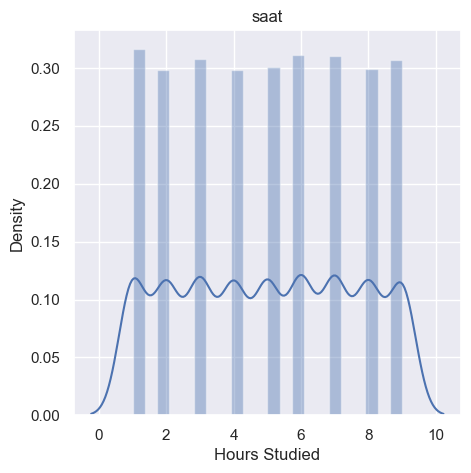

In [24]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(student_data["Hours Studied"])
plt.title("saat")
plt.show()

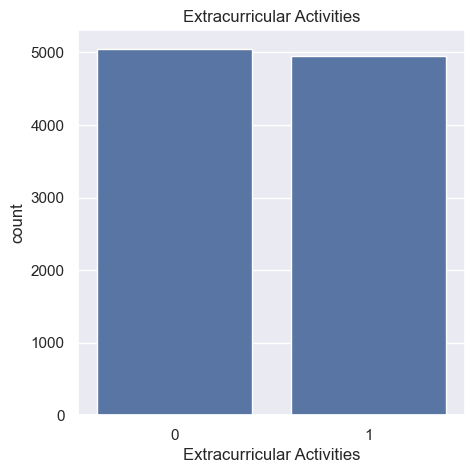

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(x="Extracurricular Activities", data=student_data)
plt.title("Extracurricular Activities")
plt.show()

In [28]:
x = student_data.drop("Performance Index", axis=1)
y = student_data["Performance Index"]


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2) 

In [32]:
y.shape, y_train.shape, y_test.shape

((10000,), (8000,), (2000,))

In [34]:
# model = RandomForestClassifier()
#model = LogisticRegression()
model = LinearRegression()

In [36]:
model.fit(x_train, y_train)

LinearRegression()

In [38]:
training_data_predections = model.predict(x_train)

In [40]:
# test_accuracy = accuracy_score(model.predict(x_test), y_test)

r2_train = metrics.r2_score(y_train, training_data_predections)
r2_train

0.9886611170188228

In [44]:
input_data = (4,5,52,5,2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[16.07686927]


C:\Users\kariz\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
